In [13]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('US_Videos_Dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,description,is_trending
0,G4M_621v1As,college farewell video#trending #viralshorts,2025-04-12T02:06:42Z,UC7k_7IF3s3TY-cowwxs_yWw,Vk_07_rider,22.0,2025-11-08,"college farewell video, DDU farewell video, fa...",125784084.0,1557178.0,1583.0,https://i.ytimg.com/vi/G4M_621v1As/default.jpg,0,DDU farewell party video \n college farewell v...,1
1,z2voqo_Jhx4,Busking in Manchester 🇬🇧 #blindfaith #guitar #...,2025-04-06T11:35:53Z,UCM_9JHB3xXPSzJfTkD86AtA,Leonardo Patrick,10.0,2025-11-08,NaN,94744011.0,925529.0,5849.0,https://i.ytimg.com/vi/z2voqo_Jhx4/default.jpg,0,NaN,1
2,jHIt9oHFLsw,This is what happens when you play Star Wars i...,2025-04-06T10:07:12Z,UC4YyKY5o60Kckk-GXOnhT2g,Violin Phonix,22.0,2025-11-08,NaN,61945818.0,1067412.0,4124.0,https://i.ytimg.com/vi/jHIt9oHFLsw/default.jpg,0,Full video : https://www.youtube.com/watch?v=Q...,1
3,gwRqLbWqKlM,LISA - FUTW (YouTube Music Nights Special Stag...,2025-03-19T03:29:33Z,UC6-BgjsBa5R3PZQ_kZ8hKPg,LLOUD Official,10.0,2025-11-08,"Blackpink, Lisa, Music, Fashion, K-Pop, kpop, ...",14555963.0,455816.0,20396.0,https://i.ytimg.com/vi/gwRqLbWqKlM/default.jpg,0,"LISA’s debut album, ‘Alter Ego’ is out now. Li...",1
4,prpRoyrutcE,Uljhi hai yeh kis jaal me tu…. Bengaluru ❤️,2025-04-14T10:17:58Z,UCiFXnvi8ESDukE25ol2foWQ,Mr.KiranJ,10.0,2025-11-08,NaN,26204942.0,336267.0,2333.0,https://i.ytimg.com/vi/prpRoyrutcE/default.jpg,0,NaN,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395915 entries, 0 to 395914
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           395915 non-null  object 
 1   title              395915 non-null  object 
 2   publishedAt        390064 non-null  object 
 3   channelId          395915 non-null  object 
 4   channelTitle       395911 non-null  object 
 5   categoryId         395898 non-null  float64
 6   trending_date      177532 non-null  object 
 7   tags               272004 non-null  object 
 8   view_count         395898 non-null  float64
 9   likes              395898 non-null  float64
 10  comment_count      395898 non-null  float64
 11  thumbnail_link     395915 non-null  object 
 12  comments_disabled  395915 non-null  int64  
 13  description        334405 non-null  object 
 14  is_trending        395915 non-null  int64  
dtypes: float64(4), int64(2), object(9)
m

In [14]:
import sys
!{sys.executable} -m pip install seaborn pandas numpy matplotlib scikit-learn

In [15]:
# Data Cleaning & Feature Selection

cols_to_drop = ['video_id', 'title', 'publishedAt', 'channelId',
                'channelTitle', 'tags', 'thumbnail_link',
                'description', 'trending_date']

df_clean = df.drop(columns=cols_to_drop, errors='ignore')

df_clean.dropna(inplace=True)

print(f"Data shape after cleaning: {df_clean.shape}")

X = df_clean.drop(columns=['is_trending'])
y = df_clean['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Unique Step): Feature Selection

print("\nPerforming Feature Selection (SelectKBest)...")

selector = SelectKBest(score_func=f_classif, k=4)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Original Features:", list(X.columns))
print("Selected Best Features:", list(selected_features))

Data shape after cleaning: (395898, 6)

Performing Feature Selection (SelectKBest)...
Original Features: ['categoryId', 'view_count', 'likes', 'comment_count', 'comments_disabled']
Selected Best Features: ['categoryId', 'view_count', 'comment_count', 'comments_disabled']


--- Round 1: Using ALL Features ---
Training GaussianNB on All Features...
Training SGDClassifier on All Features...

--- Round 2: Using SELECTED Features ---
Training GaussianNB on Selected Features...
Training SGDClassifier on Selected Features...

FINAL COMPARISON TABLE
            Model                   Data  Accuracy
0     Naive Bayes  All Features (5 cols)  0.580778
1  SGD Classifier  All Features (5 cols)  0.546918
2     Naive Bayes      Selected (4 cols)  0.567189
3  SGD Classifier      Selected (4 cols)  0.748472


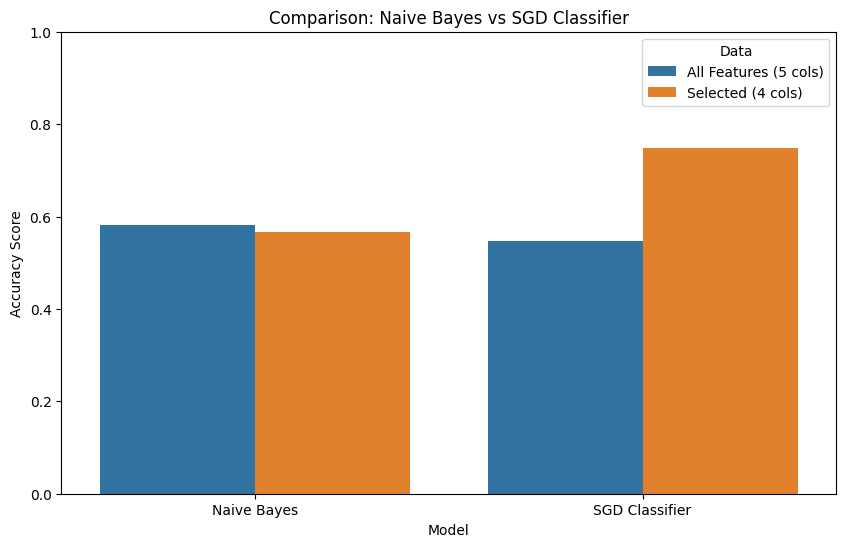

In [16]:
# Model Training with NEW Models (Naive Bayes & SGD)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

def train_and_evaluate(model, X_train_data, X_test_data, y_train_data, y_test_data, dataset_name):
    print(f"Training {model.__class__.__name__} on {dataset_name}...")
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    acc = accuracy_score(y_test_data, y_pred)
    return acc


model_nb = GaussianNB()
model_sgd = SGDClassifier(max_iter=1000, random_state=42)
results = []

#  (All Features)
print("--- Round 1: Using ALL Features ---")

# Naive Bayes
acc_nb_all = train_and_evaluate(model_nb, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "Naive Bayes", "Data": "All Features (5 cols)", "Accuracy": acc_nb_all})

# SGD Classifier
acc_sgd_all = train_and_evaluate(model_sgd, X_train, X_test, y_train, y_test, "All Features")
results.append({"Model": "SGD Classifier", "Data": "All Features (5 cols)", "Accuracy": acc_sgd_all})

# (Selected Features)
print("\n--- Round 2: Using SELECTED Features ---")

# Naive Bayes
acc_nb_sel = train_and_evaluate(model_nb, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "Naive Bayes", "Data": "Selected (4 cols)", "Accuracy": acc_nb_sel})

# SGD Classifier
acc_sgd_sel = train_and_evaluate(model_sgd, X_train_selected, X_test_selected, y_train, y_test, "Selected Features")
results.append({"Model": "SGD Classifier", "Data": "Selected (4 cols)", "Accuracy": acc_sgd_sel})


results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("FINAL COMPARISON TABLE")
print("="*40)
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="Accuracy", hue="Data")
plt.title("Comparison: Naive Bayes vs SGD Classifier")
plt.ylim(0.0, 1.0)
plt.ylabel("Accuracy Score")
plt.show()

Processing Data...
Data is ready! Starting advanced training...

Training Random Forest (Ensemble)...
 Random Forest (Ensemble) Accuracy: 0.8935
Training Neural Network (Deep Learning)...
 Neural Network (Deep Learning) Accuracy: 0.8561
 ----- FINAL PROJECT RESULTS -----
                  Model           Type  Accuracy
0         Random Forest       Ensemble  0.893483
1  Neural Network (MLP)  Deep Learning  0.856087


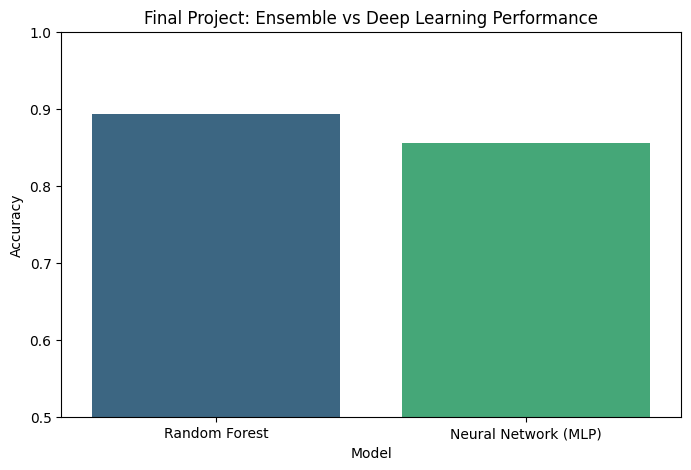


Best Performing Model: Random Forest


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('US_Videos_Dataset.csv')

cols_to_drop = ['video_id', 'title', 'publishedAt', 'channelId',
                'channelTitle', 'tags', 'thumbnail_link',
                'description', 'trending_date']
df_clean = df.drop(columns=cols_to_drop, errors='ignore')
df_clean.dropna(inplace=True)

X = df_clean.drop(columns=['is_trending'])
y = df_clean['is_trending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Processing Data...")

selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Data is ready! Starting advanced training...\n")


def train_advanced_model(model, name):
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f" {name} Accuracy: {acc:.4f}")
    return acc, y_pred

results_final = []

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
acc_rf, pred_rf = train_advanced_model(rf_model, "Random Forest (Ensemble)")
results_final.append({"Model": "Random Forest", "Type": "Ensemble", "Accuracy": acc_rf})

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, activation='relu', random_state=42)
acc_mlp, pred_mlp = train_advanced_model(mlp_model, "Neural Network (Deep Learning)")
results_final.append({"Model": "Neural Network (MLP)", "Type": "Deep Learning", "Accuracy": acc_mlp})

results_df = pd.DataFrame(results_final)

print(" ----- FINAL PROJECT RESULTS -----")
print(results_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Final Project: Ensemble vs Deep Learning Performance")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()

best_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
print(f"\nBest Performing Model: {best_model_name}")

In [19]:
import pandas as pd
import numpy as np

def predict_new_video():
    print("\n" + "="*40)
    print("  VIDEO TREND PREDICTOR ")
    print("="*40)

    try:
        views_input = input("1. Enter View Count (e.g., 5000): ")
        if not views_input.strip(): return
        views = float(views_input)

        comments = float(input("2. Enter Comment Count (e.g., 400): "))

        print("\nCommon Category IDs: 10=Music, 20=Gaming, 17=Sports, 24=Entertainment")
        cat_id = float(input("3. Enter Category ID (e.g., 10, 17): "))

        disabled_input = input("4. Are comments disabled? (yes/no): ").lower()
        disabled = 1 if disabled_input in ['yes', 'y', '1'] else 0

        if views > 0:
            engagement_rate = (comments / views) * 100
        else:
            engagement_rate = 0

        new_data = pd.DataFrame([[cat_id, views, comments, disabled]],
                                columns=['categoryId', 'view_count', 'comment_count', 'comments_disabled'])

        new_data_scaled = scaler.transform(new_data)

        prob_rf = rf_model.predict_proba(new_data_scaled)[0][1]
        prob_mlp = mlp_model.predict_proba(new_data_scaled)[0][1]

        print("\n ANALYSIS REPORT")
        print("-" * 40)

        print(f" Engagement Rate: {engagement_rate:.2f}%")
        if engagement_rate > 5.0:
            print("   ( Insight: Extremely high interaction!)")
        elif engagement_rate > 2.0:
            print("   ( Insight: Good/Healthy interaction.)")
        else:
            print("   ( Insight: Low interaction relative to views.)")

        print("-" * 40)
        print(f" Random Forest Confidence:  {prob_rf*100:.2f}%")
        print(f" Deep Learning Confidence:  {prob_mlp*100:.2f}%")

        print("\n AI FINAL VERDICT:")

        if prob_rf > 0.5 and prob_mlp > 0.5:
            print(" SUPER TRENDING! Both models agree significantly.")
            print("   Confidence: VERY HIGH")

        elif (prob_rf > 0.5 and prob_mlp < 0.5) or (prob_rf < 0.5 and prob_mlp > 0.5):
            print(" MIXED SIGNALS (Controversial).")
            if engagement_rate > 3.0:
                print("   TIP: Trust the Engagement Rate. It's likely a hidden hit.")
            else:
                print("   TIP: Likely not trending yet.")

        elif engagement_rate > 3.0:
            print(" HIDDEN GEM DETECTED!")
            print("   Models see low views, BUT high engagement suggests viral potential.")

        else:
            print(" NOT TRENDING.")
            print("   Low probability and low engagement.")

    except ValueError:
        print("\n Error: Please enter valid numbers only!")

print("System Ready. Type details below.")

try:
    while True:
        predict_new_video()

        cont = input("\n Do you want to test another video? (yes/no): ")
        if cont.lower() not in ['yes', 'y']:
            print("\n Goodbye! Exiting program...")
            break

except KeyboardInterrupt:
    print("\n\n Program stopped by user manually. (Safe Exit)")


System Ready. Type details below.

 🎬 VIDEO TREND PREDICTOR 
1. Enter View Count (e.g., 5000): 50936
2. Enter Comment Count (e.g., 400): 356

Common Category IDs: 10=Music, 20=Gaming, 17=Sports, 24=Entertainment
3. Enter Category ID (e.g., 10, 17): 10
4. Are comments disabled? (yes/no): no

📊 ANALYSIS REPORT
----------------------------------------
 Engagement Rate: 0.70%
   (⚠️ Insight: Low interaction relative to views.)
----------------------------------------
 Random Forest Confidence:  30.00%
 Deep Learning Confidence:  43.57%

🤖 AI FINAL VERDICT:
❌ NOT TRENDING.
   Low probability and low engagement.

🔄 Do you want to test another video? (yes/no): no

👋 Goodbye! Exiting program...


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('US_Videos_Dataset.csv')

cols_to_drop_text = ['video_id', 'title', 'publishedAt', 'channelId',
                     'channelTitle', 'tags', 'thumbnail_link',
                     'description', 'trending_date']
df_clean = df.drop(columns=cols_to_drop_text, errors='ignore')
df_clean.dropna(inplace=True)

y = df_clean['is_trending']

print("  Testing BEFORE Feature Selection (All Features)...")
X_all = df_clean.drop(columns=['is_trending'])
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)

scaler_all = StandardScaler()
X_train_all_sc = scaler_all.fit_transform(X_train_all)
X_test_all_sc = scaler_all.transform(X_test_all)

rf_all = RandomForestClassifier(n_estimators=50, random_state=42)
rf_all.fit(X_train_all_sc, y_train_all)
acc_rf_before = accuracy_score(y_test_all, rf_all.predict(X_test_all_sc))

mlp_all = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42)
mlp_all.fit(X_train_all_sc, y_train_all)
acc_mlp_before = accuracy_score(y_test_all, mlp_all.predict(X_test_all_sc))

print(f"   Done. (RF: {acc_rf_before:.2%}, MLP: {acc_mlp_before:.2%})")

print("\n  Testing AFTER Feature Selection (Selected Features)...")
selected_features = ['view_count', 'comment_count', 'categoryId', 'comments_disabled']
X_sel = df_clean[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)

scaler_sel = StandardScaler()
X_train_sel_sc = scaler_sel.fit_transform(X_train_sel)
X_test_sel_sc = scaler_sel.transform(X_test_sel)

rf_sel = RandomForestClassifier(n_estimators=50, random_state=42)
rf_sel.fit(X_train_sel_sc, y_train_sel)
acc_rf_after = accuracy_score(y_test_sel, rf_sel.predict(X_test_sel_sc))

mlp_sel = MLPClassifier(hidden_layer_sizes=(32,), max_iter=300, random_state=42)
mlp_sel.fit(X_train_sel_sc, y_train_sel)
acc_mlp_after = accuracy_score(y_test_sel, mlp_sel.predict(X_test_sel_sc))

print(f"   Done. (RF: {acc_rf_after:.2%}, MLP: {acc_mlp_after:.2%})")

print(" ----- IMPACT OF FEATURE SELECTION REPORT -----")
results = pd.DataFrame({
    'Model': ['Random Forest', 'Deep Learning (MLP)'],
    'Accuracy BEFORE (All Data)': [acc_rf_before, acc_mlp_before],
    'Accuracy AFTER (Selection)': [acc_rf_after, acc_mlp_after],
    'Improvement': [acc_rf_after - acc_rf_before, acc_mlp_after - acc_mlp_before]
})

results['Accuracy BEFORE (All Data)'] = results['Accuracy BEFORE (All Data)'].map('{:.2%}'.format)
results['Accuracy AFTER (Selection)'] = results['Accuracy AFTER (Selection)'].map('{:.2%}'.format)
results['Improvement'] = results['Improvement'].map('{:+.2%}'.format)

print(results)

  Testing BEFORE Feature Selection (All Features)...
   Done. (RF: 92.36%, MLP: 85.80%)

  Testing AFTER Feature Selection (Selected Features)...
   Done. (RF: 89.25%, MLP: 85.67%)
 ----- IMPACT OF FEATURE SELECTION REPORT -----
                 Model Accuracy BEFORE (All Data) Accuracy AFTER (Selection)  \
0        Random Forest                     92.36%                     89.25%   
1  Deep Learning (MLP)                     85.80%                     85.67%   

  Improvement  
0      -3.11%  
1      -0.14%  


🔧 Fixing Data Split...
✅ Data Fixed! Train shape: (316718,), Test shape: (79180,)
   Class distribution in Train: [174693 142025]

⚙️ Training Base Models (Midterm)...

🚀 Generating Final Report Table...

                           Accuracy  Precision    Recall        F1   ROC-AUC  \
Model                                                                          
Random Forest (Final)      0.927810   0.914582  0.925451  0.919984  0.974512   
Deep Learning MLP (Final)  0.878454   0.860698  0.869716  0.865184  0.947751   
Decision Tree              0.891147   0.878640  0.878615  0.878628  0.889987   
Logistic Regression        0.678378   0.737837  0.438646  0.550198  0.794096   

                              Time(s)  
Model                                  
Random Forest (Final)      137.599427  
Deep Learning MLP (Final)  584.227809  
Decision Tree                0.025192  
Logistic Regression          0.004343  

EN IYI MODEL: Random Forest (Final)
ROC-AUC: 0.9745 | Accuracy: 0.9278


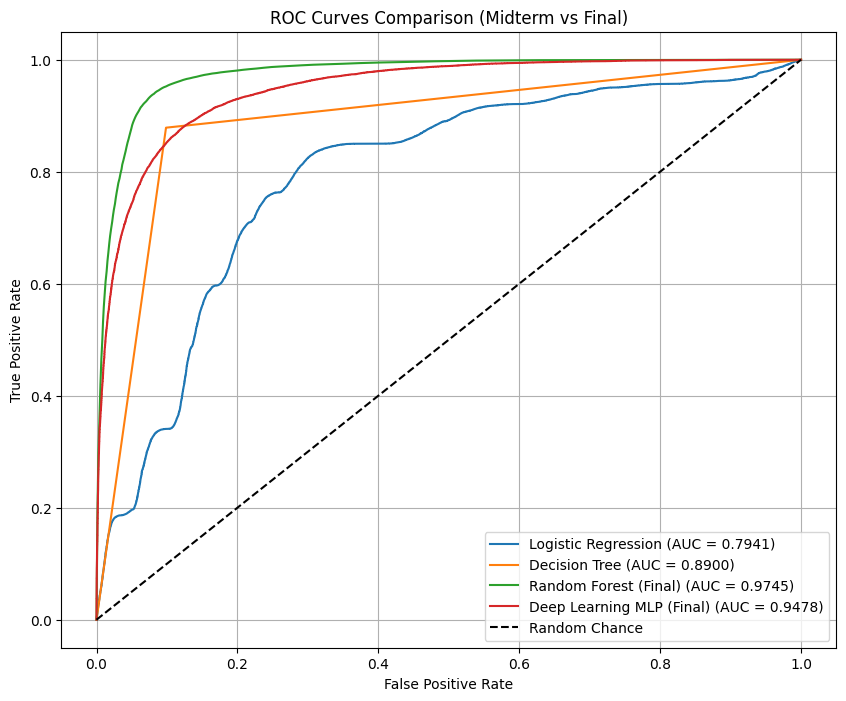

In [21]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

print(" Fixing Data Split...")

if 'X' in locals() and 'y' in locals():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f" Data Fixed! Train shape: {y_train.shape}, Test shape: {y_test.shape}")
    print(f"   Class distribution in Train: {np.bincount(y_train)}")
else:
    print(" Error: X and y variables not found. Please run your Data Preparation cell first.")

print("\n Training Base Models (Midterm)...")

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)


models_list = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest (Final)": rf_model,
    "Deep Learning MLP (Final)": mlp_model
}

results = []
plt.figure(figsize=(10, 8))

print("\n Generating Final Report Table...\n")

for name, model in models_list.items():
    start_time = time.time()
    try:
        y_pred = model.predict(X_test_scaled)
    except:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    end_time = time.time()

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": auc,
        "Time(s)": end_time - start_time
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")


results_df = pd.DataFrame(results)
results_df = results_df.set_index("Model")
results_df = results_df.sort_values(by="ROC-AUC", ascending=False) # الترتيب حسب الأفضل

print("="*100)
print(results_df)
print("="*100)

best_model_name = results_df.index[0]
best_acc = results_df.iloc[0]['Accuracy']
best_auc = results_df.iloc[0]['ROC-AUC']

print(f"\nEN IYI MODEL: {best_model_name}")
print(f"ROC-AUC: {best_auc:.4f} | Accuracy: {best_acc:.4f}")


plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison (Midterm vs Final)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()